<a href="https://colab.research.google.com/github/tienmai65/coderschool/blob/master/Copy_of_DAwP_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.imgur.com/0AUxkXt.png)

# SF Salaries Exercise 

Explore San Francisco city employee salary data.

## Overview

One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.



Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

## Resourses

[Pandas API Reference](https://pandas.pydata.org/pandas-docs/stable/api.html)

[NumPy Reference](https://docs.scipy.org/doc/numpy/reference/)

[Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)


**Import libraries**

In [0]:
import pandas as pd
import numpy as np

**Read `Salaries.csv` as a dataframe called `sal`.**

In [0]:
link = "https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/Salaries.csv"
sal = pd.read_csv(link)
sal1=pd.DataFrame(data=sal)

**Check the head of the DataFrame.**

In [3]:
print(sal.head())
print(sal.columns.values)
print(sal.index)

   Id       EmployeeName  ...         Agency  Status
0   1     NATHANIEL FORD  ...  San Francisco     NaN
1   2       GARY JIMENEZ  ...  San Francisco     NaN
2   3     ALBERT PARDINI  ...  San Francisco     NaN
3   4  CHRISTOPHER CHONG  ...  San Francisco     NaN
4   5    PATRICK GARDNER  ...  San Francisco     NaN

[5 rows x 13 columns]
['Id' 'EmployeeName' 'JobTitle' 'BasePay' 'OvertimePay' 'OtherPay'
 'Benefits' 'TotalPay' 'TotalPayBenefits' 'Year' 'Notes' 'Agency' 'Status']
RangeIndex(start=0, stop=148654, step=1)


**Use the .info() method to find out how many entries there are.**

In [4]:
print(sal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB
None


**What is the average BasePay ?**

Keyword: [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)

In [0]:
sal['BasePay'].mean()

66325.44884050643

**What is the lowest and highest amount of BasePay?**

Keyword: 
[min](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html) , 
[max](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)

In [0]:
print(sal['BasePay'].max())

319275.01


In [0]:
print(sal['BasePay'].min())

-166.01


**How about OvertimePay in the dataset? What is the average, lowest, highest amount?**

In [0]:
print(sal['OvertimePay'].min())


-0.01


In [0]:
print(sal['OvertimePay'].max())

245131.88


**What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).**

In [0]:
print(sal.loc[sal['EmployeeName']=='JOSEPH DRISCOLL','JobTitle'])

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object


In [0]:
# Now try to select Employees who have name "GARY JIMENEZ"
# Your code here
print(sal.loc[sal['EmployeeName']=='GARY JIMENEZ','JobTitle'])

1    CAPTAIN III (POLICE DEPARTMENT)
Name: JobTitle, dtype: object


**How much does JOSEPH DRISCOLL make (including benefits)?**

In [0]:
print(sal.loc[sal['EmployeeName']=='JOSEPH DRISCOLL','TotalPayBenefits'])

24    270324.91
Name: TotalPayBenefits, dtype: float64


**What is the name of highest paid person (including benefits)?**

In [0]:
#take only the column of total pay and name
df=sal[['TotalPayBenefits','EmployeeName']]
#print(df)
#find the max pay
maxPay=df['TotalPayBenefits'].max()
print(maxPay)
#find the name that has that max pay
highestPay=sal.loc[sal['TotalPayBenefits']==maxPay,'EmployeeName']
print(highestPay)

567595.43
0    NATHANIEL FORD
Name: EmployeeName, dtype: object


**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [0]:
#take only the column of total pay and name
df=sal[['TotalPayBenefits','EmployeeName']]
#print(df)
#find the max pay
minPay=df['TotalPayBenefits'].min()
print(minPay)
#find the name that has that max pay
lowestPay=sal.loc[sal['TotalPayBenefits']==minPay,'EmployeeName']
print(lowestPay)
#the negative number is weird

-618.13
148653    Joe Lopez
Name: EmployeeName, dtype: object


**What was the average (mean) BasePay of all employees per year? (2011-2014) ?**
Keyword: _groupby_

In [0]:
sal.groupby('BasePay')['BasePay'].sum().mean()

89681.62165688575

**How many unique job titles are there?**

Keyword: _unique, nunique_

In [0]:
sal['JobTitle'].nunique()

2159

**What are the top 5 most common jobs?**

Keyword: *value_counts*

In [0]:
jobCount=sal.groupby('JobTitle')['JobTitle'].value_counts().sort_values(ascending=False)
commonJob=jobCount.head(5)
print(commonJob.index)

MultiIndex(levels=[['ACCOUNT CLERK', 'ACCOUNTANT', 'ACCOUNTANT INTERN', 'ACPO,JuvP, Juv Prob (SFERS)', 'ACUPUNCTURIST', 'ADMINISTRATIVE ANALYST', 'ADMINISTRATIVE ANALYST II', 'ADMINISTRATIVE ANALYST III', 'ADMINISTRATIVE ENGINEER', 'ADMINISTRATIVE SERVICES MANAGER', 'ADMINISTRATOR, SFGH MEDICAL CENTER', 'AFFIRMATIVE ACTION SPECIALIST', 'AGRICULTURAL INSPECTOR', 'AIRPORT ASSISTANT DEPUTY DIRECTOR, BUSINESS ADMINI', 'AIRPORT ASSISTANT DEPUTY DIRECTOR, OPERATIONS', 'AIRPORT COMMUNICATIONS OPERATOR', 'AIRPORT COMMUNICATIONS SUPERVISOR', 'AIRPORT ECONOMIC PLANNER', 'AIRPORT ELECTRICIAN', 'AIRPORT ELECTRICIAN SUPERVISOR', 'AIRPORT EMERGENCY PLANNING COORDINATOR', 'AIRPORT MECHANICAL MAINTENANCE SUPERVISOR', 'AIRPORT NOISE ABATEMENT SPECIALIST', 'AIRPORT OPERATIONS SUPERVISOR', 'AIRPORT POLICE SERVICES AIDE', 'AIRPORT PROPERTY SPECIALIST I', 'AIRPORT SAFETY OFFICER', 'ANESTHETIST', 'ANIMAL CARE ASSISTANT SUPERVISOR', 'ANIMAL CARE ATTENDANT', 'ANIMAL CARE SUPERVISOR', 'ANIMAL CONTROL OFFICER',

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [0]:
jobCount=sal.groupby('JobTitle')['JobTitle'].count().reset_index(name='count')
#print(jobCount)
onePerson=jobCount[jobCount['count']==1]
print('Numer of JobTitles represented by only one person is: ', len(onePerson))

numer of JobTitles represented by only one person is:  239


**How many people have the word Chief in their job title?**

In [0]:
sub='Chief'
wordChief=sal['JobTitle'].astype(str).str.contains(sub).reset_index(name='result')
result=wordChief.loc[wordChief['result']==True]
print(len(result))

0


## Data Visualization

**Implement seaborn's countplot with x='Year'**

   Id       EmployeeName  ...         Agency  Status
0   1     NATHANIEL FORD  ...  San Francisco     NaN
1   2       GARY JIMENEZ  ...  San Francisco     NaN
2   3     ALBERT PARDINI  ...  San Francisco     NaN
3   4  CHRISTOPHER CHONG  ...  San Francisco     NaN
4   5    PATRICK GARDNER  ...  San Francisco     NaN

[5 rows x 13 columns]


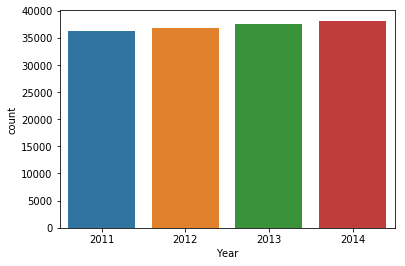

In [9]:
import seaborn as sns
#data_home = "https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/"
data=pd.DataFrame(data=sal)
print(data.head(5))
sns.countplot(x=data['Year'])

**Implement seaborn's distplot for BasePay of Year 2011**

In [14]:
data2=data[data['Year']==2011]
data2.head(5)
sns.

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**How about other Year**

## Bonus

**Visualize top 5 Jobs with BasePay, Benefits and OvertimePay**

Keyword: *index, isin, groupby, mean, plot*

,BasePay,Benefits,OvertimePay
JobTitle,,,
Police Officer 3,108508.662621,32829.713693,16418.062615
Public Svc Aide-Public Works,8091.876070,1379.748050,60.017744
Registered Nurse,102650.396486,35950.834170,4204.840575
Special Nurse,29929.166718,3210.342240,651.723372
Transit Operator,51772.154465,27355.597533,11143.260866


**Fun Fact: Is there a correlation between length of the Job Title string and Salary?**

*Hint: corr()*

# Great Job!